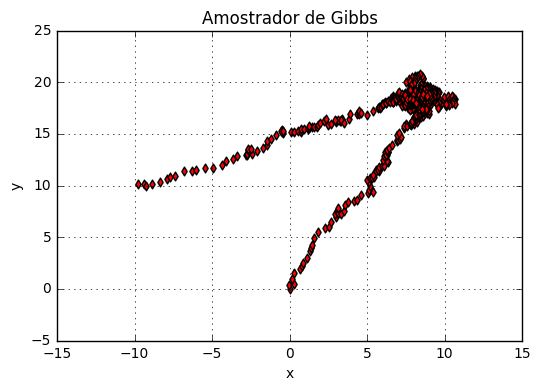

In [12]:
%matplotlib inline
from math import *
import numpy as np
from matplotlib.pylab import * 


n=500
rho=.99 #correlation
#Means
m1 = 10
m2 = 20
#Standard deviations
s1 = 1
s2 = 1
#Initialize vectors
x=np.zeros(n, np.float)
y=np.zeros(n, np.float)
sd=sqrt(1-rho**2)
# the core of the method: sample recursively from two normal distributions
# Tthe mean for the current sample, is updated at each step.
for i in range(1,n):
  x[i] = normal(m1+rho*(y[i-1]-m2)/s2,s1*sd)
  y[i] = normal(m2+rho*(x[i-1]-m1)/s1,s2*sd)

scatter(x,y,marker='d',c='r')
title('Amostrador de Gibbs')
xlabel('x')
ylabel('y')
grid()

show()

In [2]:
import json
import nltk
import sklearn
import string
import numpy as np
from nltk.corpus import stopwords

In [3]:
with open('out_file/contents_data.json') as f:
    contents_data_json = f.read()
contents_data = json.loads(contents_data_json)

In [4]:
print(len(contents_data))
print(contents_data[195])

48052
{u'comment': u'i had this phone for 1 year and its  great  \r\nit also have an awesme app callled garageband  \r\ngaming performance is the best  \r\nits even better than galaxy s7  \r\nsome times it being hot , i think because its made from aluminium anyway it have a strong glass and strong material it have a great battery and a super camera  \r\nanyway this is an awesome phone  \r\nand remember Apple devices are better than androids in performance. \r\nthe only missing thing in this phone is ios 10.3', u'time': u'21 Mar 2017'}


In [5]:
eng_stopwords = set(stopwords.words('english'))

In [50]:
def clean_txt(txt):
    txt = txt.lower()
    for i in string.punctuation:
        txt = txt.replace(i, ' ')
    txt_token = txt.split(' ')
    res_token = []
    for txt in txt_token:
        if txt and txt not in eng_stopwords:
            res_token.append(txt)
    res = " ".join(res_token)
    return res

In [51]:
clean_txt("earth!, test i you & I will test it later")

'earth test test later'

In [52]:
contents_cleaned = []
for content_data in contents_data:
    content_cleaned = {}
    content_cleaned['comment'] = clean_txt(content_data['comment'])
    content_cleaned['time'] = content_data['time']
    contents_cleaned.append(content_cleaned)
print(len(contents_cleaned))

48052


In [53]:
contents_cleaned[0]

{'comment': u'problem battery draining fast even getting 6 hours usage',
 'time': u'15 hours ago'}

In [54]:
cnt_vec = sklearn.feature_extraction.text.CountVectorizer()
text = []
for content_cleaned in contents_cleaned:
    text.append(content_cleaned['comment'])
cnt_vec.fit(text)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [55]:
res = cnt_vec.transform(text)
res.shape

(48052, 35667)

In [56]:
len(cnt_vec.vocabulary_)

35667

In [57]:
vocabulary_inverse = dict((v,k) for k,v in cnt_vec.vocabulary_.iteritems())
len(vocabulary_inverse)

35667

In [58]:
n = 4
tmp = res[n].toarray()
for i in range(tmp.shape[1]):
    if tmp[0, i]:
        print vocabulary_inverse[i], tmp[0, i]
print(contents_cleaned[n])
print(contents_data[n])

11 1
6s 1
go 3
ios 1
ip 1
iphone 1
lag 1
much 1
pay 1
people 1
plus 3
thing 1
worth 1
{'comment': u'people 6 plus go 6 plus worth pay go 7 plus go iphone 7 ip 6s much thing ios 11 lag', 'time': u'02 Dec 2017'}
{u'comment': u'people who own 6 S plus ... Should I go for 6 S plus or is it worth to pay more and go for 7 plus ?no , you should go iphone 7 , because ip 6s+ too much thing at ios 11 will lag', u'time': u'02 Dec 2017'}


In [59]:
np_res = res.toarray()

In [69]:
np_res[0, 0]

0

In [71]:
np.savetxt('out_file/cleaned_data_matrix.csv', np_res, fmt='%d', delimiter=',')

In [72]:
vocab = []
for i in range(len(vocabulary_inverse)):
    vocab.append(vocabulary_inverse[i])

In [78]:
with open('out_file/vocab.txt', 'w+') as f:
    for i in vocab:
        f.write(i.encode('utf8')+'\n')

In [83]:
with open('out_file/cleaned_data_matrix.csv') as f:
    total = []
    for i, line in enumerate(f):
        lin = line.split(',')
        total.append(lin)
        if i % 10000 == 0:
            print(i)
reloaded = np.array(total, dtype=np.int)
reloaded.shape

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000


(48052, 35667)